In [153]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style='whitegrid')

### Background

Yeast (saccharomyces cerevisiae) is used in the production of beer, wine, bread and a whole lot of biotech applications such as creating complex pharmaceuticals. All living organisms store information in their DNA and this information is rewritten from DNA into a different format (molecule) called proteins. Proteins then control several activities within the organism. The path from DNA to Protein is relatively simple. A specific gene on the DNA gets transcribed to mRNA, that gets translated to protein. Common assumption says that the translation step is linear, more mRNA means more protein. Gene expression can however be tissue or condition specific; depending on the tissue or condition, a gene may be expressed/not expressed, lowly/highly expressed.

### Objective

We are given the transcriptome profiles of 92 yeast samples under different conditions. The profiles are in the normalized form known as Transcripts Per Million (TPM). We have about 6000 genes in our dataset. Our goals in this project are:

1. Perform dimensionality reduction on our data.
2. Visualize our data from the lenses of the principal components to bring to light patterns within it.

In [154]:
data = pd.read_csv('data/yeast/SC_expression.csv', index_col=0).T
data.head()

,YAL008W,YBR255W,YGR164W,YGR131W,YNL003C,YBR135W,YBR160W,YJL082W,YJL142C,YPL191C,...,YNL185C,YCR067C,YGR269W,YMR147W,YCR089W,YPR117W,YHR086W,YBR015C,YPL013C,YHR083W
IFFABF,70.804931,36.368786,0.351389,7.379174,82.049386,45.065669,68.872290,90.746270,0.790626,26.090651,...,26.266345,112.795944,3.426045,20.819812,44.977822,56.837209,99.706695,190.804355,54.728873,69.838610
SAASCC,30.970186,16.860290,0.904239,5.858715,78.480411,21.004719,28.295146,116.514965,3.070645,25.865004,...,34.832040,138.819527,1.733125,12.697023,110.637411,145.262230,61.827343,176.383123,26.015710,47.378357
IFFAFF,118.384653,27.726452,0.456027,12.130323,67.218405,53.811206,61.928490,73.602785,2.827368,29.641766,...,21.798099,102.514908,4.560272,29.094533,42.045705,42.410527,100.325977,190.072124,52.351919,66.123940
IFFAFA,110.703950,34.527928,0.292610,12.679748,64.179030,42.916069,63.106129,81.930677,2.438413,28.188054,...,26.822543,106.412343,3.608851,34.625465,47.402749,45.744628,100.657689,196.341015,53.450013,60.960325
INICIA,74.102235,35.440199,0.000000,11.276427,75.713153,17.720100,43.494790,136.928044,28.996527,11.276427,...,27.385609,104.709680,1.610918,11.276427,64.436726,53.160299,128.873453,148.204471,48.327545,69.269481


Above, I have shown the first 5 rows of our data. The column IDs are the gene names, the row IDs are for the different samples. The number of genes to samples (row x column) is shown below.

In [155]:
print(data.shape)

(92, 6071)


### Principal Component Analysis

Principal component analysis (PCA) is a dimensionality reduction method widely used in the machine learning, data science and bioinformatics communities. You are probably wondering what I mean by "dimensionality reduction". 
Simply said, the dimensionality of a tabular dataset (data with rows and columns) is the number of columns the dataset has. Organisms can have several thousands of genes, *Zea mays* (maize) which is a popular part of our food resource has more than 20,000 genes. When we perform transcriptome analysis, we usually have just a few samples of the organism of interest. The largest projects we know so far in biology look at about 1000 samples. This means if we comsider our dataset to be rows (samples) x column (number of genes), we may have a dataset of 1000 x 20,000. You immediately see, that the number of columns is far larger than the number of rows. In machine learning, we call this a "curse of dimensionality".


Of course the word "curse" sounds a bit harsh. However, we have dimensionality reduction methods that help us out. PCA is one of such methods. PCA will take the original columns in the data and generate new columns that are linear combinations of the original columns. However, the advantage is, the newly generated columns are generated such that information is packed into the earliest columns. By so doing, the majority of information in 20000 genes can be compressed (with some loss of course) into fewer columns. Below we will perform PCA on the yeast transcriptome with 6071 genes and just 92 samples.

In [156]:
# 1. Standardize data: Subtract mean and divide by standard deviation
scaler = StandardScaler()
data_std = scaler.fit_transform(data)

# 2. Perform PCA
pca = PCA(n_components=0.95)
pca.fit(data_std)
pcs = pca.transform(data_std)
pcs.shape

(92, 18)

The above code has performed the PCA for us. Very brief. But lets unpack what we did above.
1. Standardize data: Here, we subtracted the mean of every column from values in the column and divided these new values with the standard deviation. This is also popularly known as zero-centering the data and scaling to unit variance.

2. We performed PCA by asking our PCA algorithm to keep as much as 95 % of the information from the original dataset while reducing the dimensionality (we specified this by n_component=0.95). The new columns generated are what I called "pcs" for "principal components".

The new data now has 18 columns (pcs) as compared to the original 6071 genes.

We have performed dimensionality reduction on our data, so objective 1 is done. Now we visualize the pcs to see if some patterns occur in our data. 

Text(0, 0.5, 'PC 8')

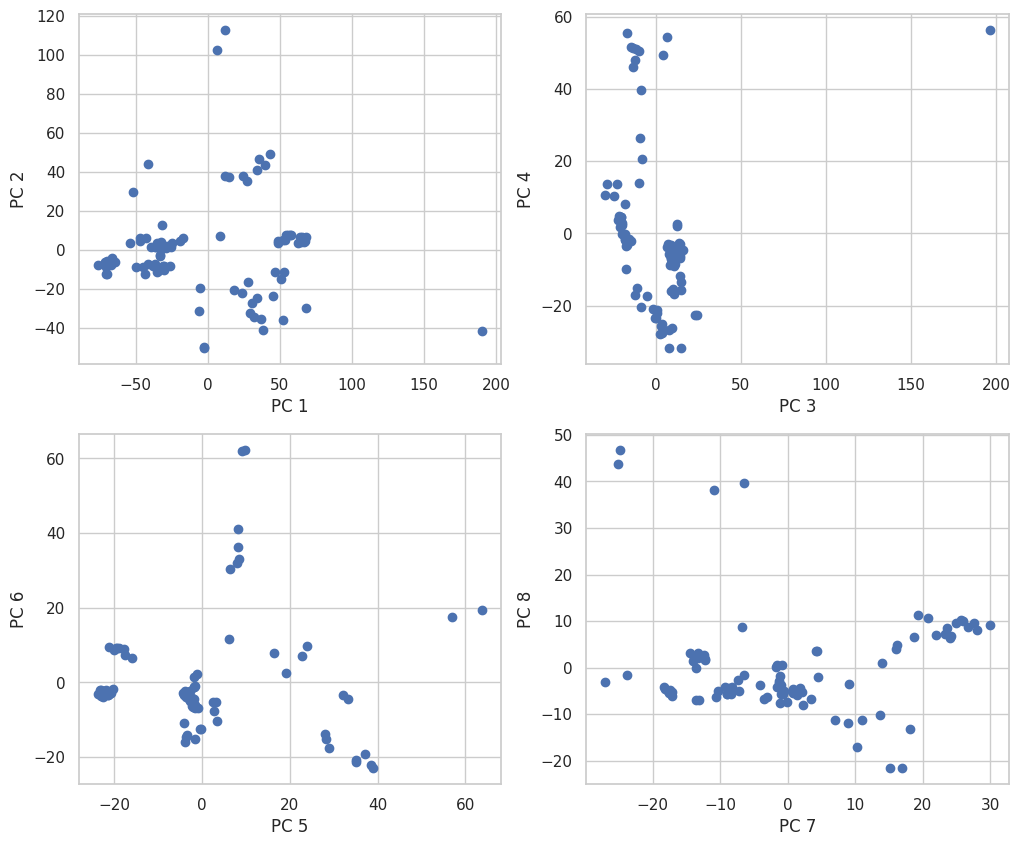

In [157]:
fig, ax = plt.subplots(2, 2, figsize=(12, 10))
ax[0, 0].scatter(pcs[:, 0], pcs[:, 1])
ax[0, 0].set_xlabel('PC 1')
ax[0, 0].set_ylabel('PC 2')

ax[0, 1].scatter(pcs[:, 2], pcs[:, 3])
ax[0, 1].set_xlabel('PC 3')
ax[0, 1].set_ylabel('PC 4')

ax[1, 0].scatter(pcs[:, 4], pcs[:, 5])
ax[1, 0].set_xlabel('PC 5')
ax[1, 0].set_ylabel('PC 6')

ax[1, 1].scatter(pcs[:, 6], pcs[:, 7])
ax[1, 1].set_xlabel('PC 7')
ax[1, 1].set_ylabel('PC 8')

Above we have created scatter plots of the 92 samples using PC1 to PC6. There seem to be some clusters of points when you see all three plots. However, we can't really tell what each cluster means. When we perform this experiments in the lab, we know the treatment or condition for each sample. We could color samples by conditions and see if samples in similar conditions cluster together. This will be a good pointer that our experiments were done correctly.

In [158]:
condition_annotation = pd.read_csv('data/yeast/conditions_annotation.csv', index_col=0)
condition_annotation.head()

,primary,secondary,additional_information
ID,,,
AFIQCI,wildtype,wildtype 1,NaN
AFIQBR,wildtype,wildtype 2,NaN
AFIINC,itc1,itc1-1_dUTP,NaN
AFNAQI,itc1,itc1-1_dUTP,NaN
AFNCCR,swr1,swr1 mutant,NaN


Above are the annotations provided for our samples, We have secondary annotations. We will color our plots based on these and see if we have some patterns.

In [159]:
# This code block just tries to get the secondary annotations for our samples
from sklearn.preprocessing import LabelEncoder
c_s = []
for ID in data.index.tolist():
    if ID in condition_annotation.index:
        if isinstance(condition_annotation.loc[ID, 'secondary'], str):
            c_s.append(condition_annotation.loc[ID, 'secondary'])

        else:
            c_s.append(condition_annotation.loc[ID, 'secondary'][0])
    else:
        c_s.append('unknown')

encoder = LabelEncoder()
c_s_enc = encoder.fit_transform(c_s)

Text(0, 0.5, 'PC 8')

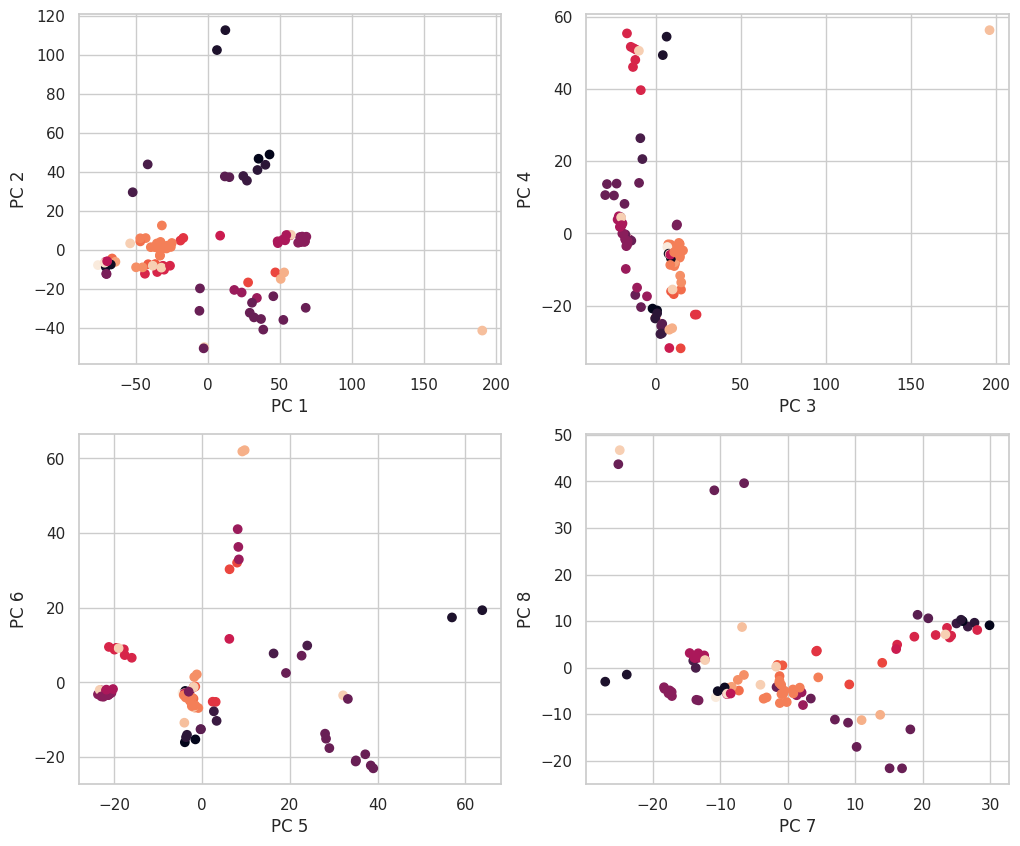

In [160]:
fig, ax = plt.subplots(2, 2, figsize=(12, 10))
ax[0, 0].scatter(pcs[:, 0], pcs[:, 1], c=c_s_enc)
ax[0, 0].set_xlabel('PC 1')
ax[0, 0].set_ylabel('PC 2')

ax[0, 1].scatter(pcs[:, 2], pcs[:, 3], c=c_s_enc)
ax[0, 1].set_xlabel('PC 3')
ax[0, 1].set_ylabel('PC 4')

ax[1, 0].scatter(pcs[:, 4], pcs[:, 5], c=c_s_enc)
ax[1, 0].set_xlabel('PC 5')
ax[1, 0].set_ylabel('PC 6')

ax[1, 1].scatter(pcs[:, 6], pcs[:, 7], c=c_s_enc)
ax[1, 1].set_xlabel('PC 7')
ax[1, 1].set_ylabel('PC 8')


As we can see above, we have data points clustering based on condition. This can be seen by similar colors clustering together. While this may not be perfect, we can be confident that th experiments from these yeast samples was definitely in the right direction. This means further downstream analysis should fine some genes differenially expressed in different conditions